# Salifort Motors. Employee retention project

### Goal
Predicting employee retention. The company is struggling to keep its workforce, resulting in a high turnover rate and high HR costs. The goal is to understand what actions can influence this situation.
### Dataset
We have data of Salifort employees such as satisfaction reported level, score of last performance review, number of project involved, average number of hours worked per month, tenure, if the employee suffer an accident or not, department, and salary level.
### Plan
Since the variable we are seeking to predict is categorical, the team will build a logistic regression and a tree-based machine learning models to check which perform better.

## Package Importing and Data Loading

In [3]:
# Import packages
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# This module lets us save our models once we fit them.
import joblib

# This module lets us check time consumed for model training and tuning
import time

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Gather basic information about the data
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
cols = ["time_spend_company", "Work_accident", "left", 
        "promotion_last_5years", "Department", "salary"]

for col in cols:
    print(f"Unique values in {col}:")
    print(df0[col].unique())
    print("-" * 40)

Unique values in time_spend_company:
[ 3  6  4  5  2  8 10  7]
----------------------------------------
Unique values in Work_accident:
[0 1]
----------------------------------------
Unique values in left:
[1 0]
----------------------------------------
Unique values in promotion_last_5years:
[0 1]
----------------------------------------
Unique values in Department:
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
----------------------------------------
Unique values in salary:
['low' 'medium' 'high']
----------------------------------------


In [7]:
# Gather descriptive statistics about the data
df0.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Data Cleaning and Preparation

In [9]:
# Rename columns as needed
df0 = df0.rename(columns={'time_spend_company':'tenure','satisfaction_level':'satisfaction', 'average_montly_hours': 'avg_hours', 'Work_accident':'accident','promotion_last_5years':'promotion','Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction', 'last_evaluation', 'number_project', 'avg_hours',
       'tenure', 'accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')

In [10]:
# Check for missing values
df0.isnull().sum()

satisfaction       0
last_evaluation    0
number_project     0
avg_hours          0
tenure             0
accident           0
left               0
promotion          0
department         0
salary             0
dtype: int64

In [11]:
# Check for duplicates
df0.duplicated(keep=False).sum()

5346

In [12]:
# Check data frame shape
df0.shape

(14999, 10)

In [13]:
# Inspect some rows containing duplicates as needed
# Count the frequency of every unique row combination
# This series will show how many times each unique row appears
# (The rows that appear more than once are your duplicates)
duplicate_counts = df0.value_counts()

# Filter for combinations that appeared more than once and show the top 5
print("Top 5 Most Frequent Row Combinations (Duplicates):")
top_5_duplicates = duplicate_counts[duplicate_counts > 1].head(5)

if top_5_duplicates.empty:
    print("No rows appeared more than once (no duplicates found after counting).")
else:
    print(top_5_duplicates)

Top 5 Most Frequent Row Combinations (Duplicates):
satisfaction  last_evaluation  number_project  avg_hours  tenure  accident  left  promotion  department  salary
0.46          0.57             2               139        3       0         1     0          sales       low       6
0.37          0.46             2               156        3       0         1     0          sales       low       4
0.10          0.85             6               266        4       0         1     0          sales       low       4
0.41          0.46             2               128        3       0         1     0          accounting  low       4
0.42          0.53             2               142        3       0         1     0          sales       low       4
dtype: int64


In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(inplace=False)

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction,last_evaluation,number_project,avg_hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df1.shape

(11991, 10)

## Exploratory Data Analysis (EDA) and Feature Engineering

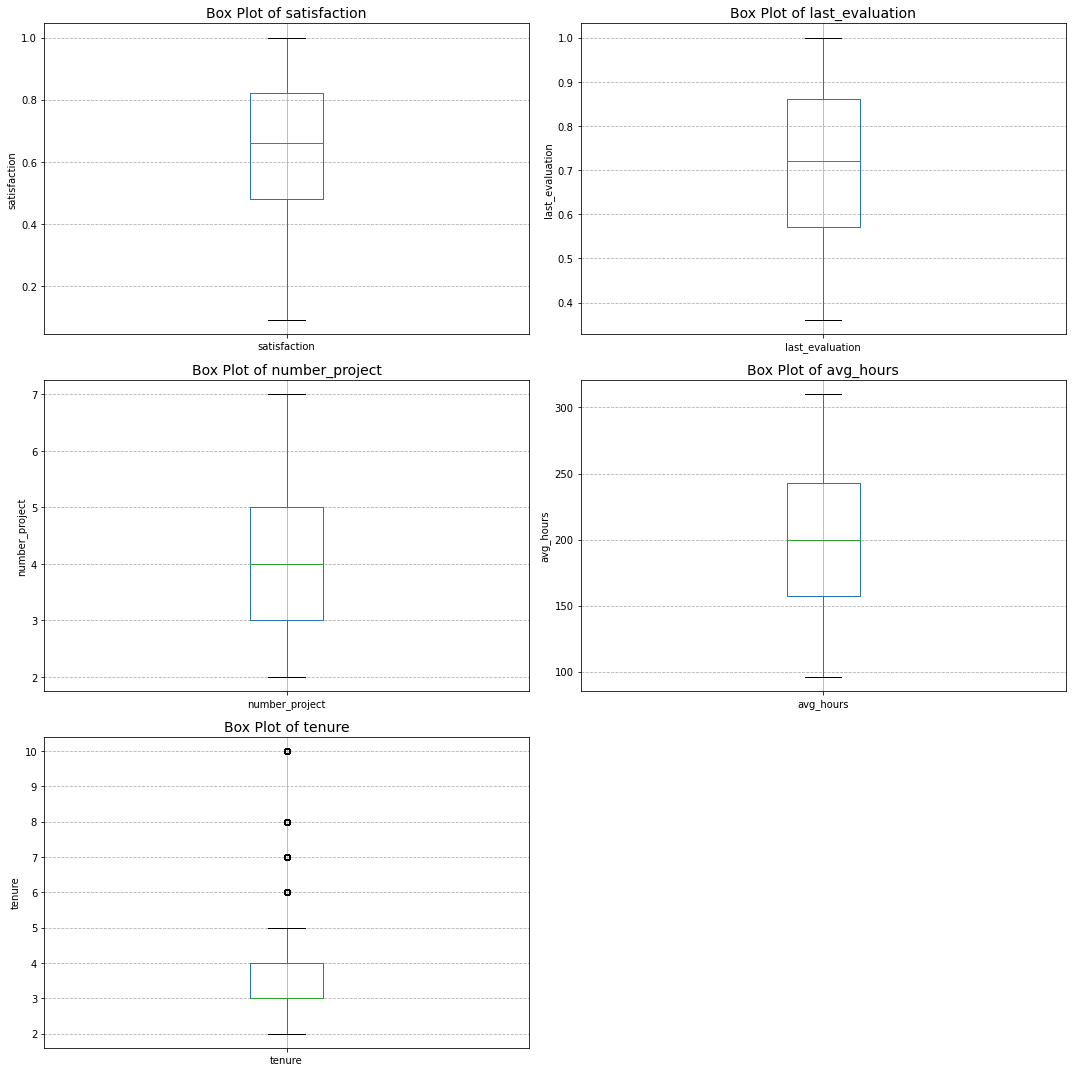

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# Select the core numerical columns for visualization
numerical_cols = [
    'satisfaction',
    'last_evaluation',
    'number_project',
    'avg_hours',
    'tenure'
]

# Set up the subplot grid (4 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy indexing

# Remove the last (unused) subplot
fig.delaxes(axes[5])

# Loop through the columns and create a boxplot on each subplot
for i, col in enumerate(numerical_cols):
    df1.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
# plt.show() # In your environment

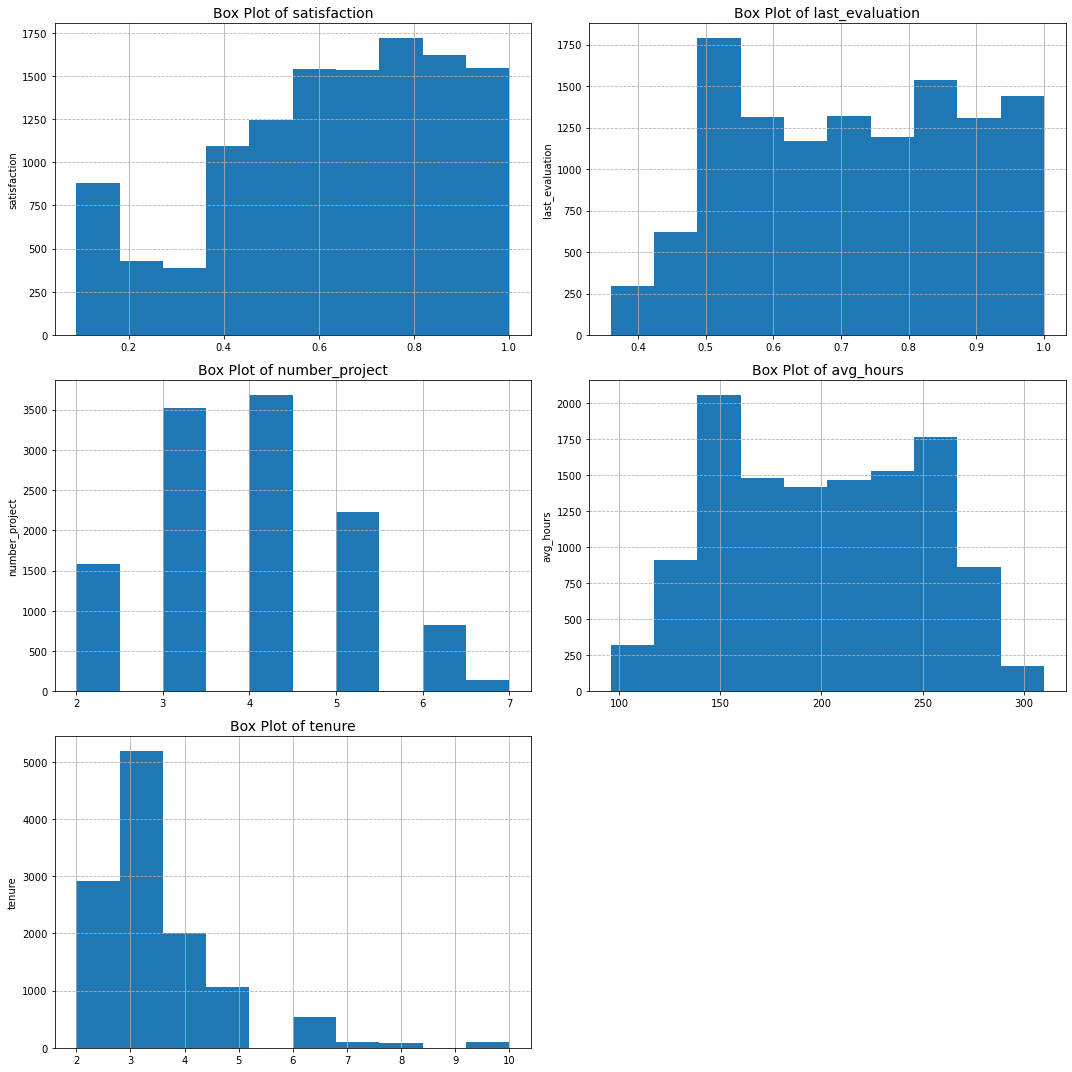

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy indexing

# Remove the last (unused) subplot
fig.delaxes(axes[5])

# Loop through the columns and create a boxplot on each subplot
for i, col in enumerate(numerical_cols):
    df1.hist(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
# plt.show() # In your environment

In [18]:
# Determine the number of rows containing outliers
# Calculate the Z-scores
z_scores = np.abs((df1['tenure'] - df1['tenure'].mean()) / df1['tenure'].std())

# Count how many data points have a Z-score greater than 3
outlier_count = (z_scores > 3).sum()

print(f"\n--- Outlier Check (Z-score > 3) ---")
print(f"Column 'avg_hours': {outlier_count} outliers found.")


--- Outlier Check (Z-score > 3) ---
Column 'avg_hours': 188 outliers found.


In [19]:
df1.dtypes

satisfaction       float64
last_evaluation    float64
number_project       int64
avg_hours            int64
tenure               int64
accident             int64
left                 int64
promotion            int64
department          object
salary              object
dtype: object

In [20]:
df1 = pd.get_dummies(df1, columns=['department', 'salary'], drop_first=True)

In [21]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
df1['left'].value_counts() / len(df1)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [22]:
df1.dtypes

satisfaction              float64
last_evaluation           float64
number_project              int64
avg_hours                   int64
tenure                      int64
accident                    int64
left                        int64
promotion                   int64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

In [23]:
df1.columns

Index(['satisfaction', 'last_evaluation', 'number_project', 'avg_hours',
       'tenure', 'accident', 'left', 'promotion', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

## Model Building and Training

### Logistic Regression

Our first model to evaluate is the most simple, Logistic Regression. We need to assure that there is no multicollinearity between two predictor variables, we'll check that with the variance inflation factor method.

In [24]:
### CHECK MULTICOLLINEARITY
# Assuming df1 is your DataFrame *after* one-hot encoding,
# and it contains ONLY the independent (predictor) variables.

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns

# Calculate VIF for each feature
# We use a try/except block just in case a column is perfectly correlated (VIF will be infinite)
for i in range(len(df1.columns)):
    try:
        vif_data.loc[i, 'VIF'] = variance_inflation_factor(df1.values, i)
    except Exception:
        vif_data.loc[i, 'VIF'] = float('inf')

# Sort and display the results
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print("--- Multicollinearity Check (VIF) ---")
print(vif_data)

--- Multicollinearity Check (VIF) ---
                   feature        VIF
0          last_evaluation  20.109922
1                avg_hours  19.146531
2           number_project  13.868252
3             satisfaction   8.116624
4                   tenure   7.603370
5               salary_low   5.935720
6            salary_medium   5.462437
7         department_sales   3.690612
8     department_technical   2.873215
9       department_support   2.525617
10        department_RandD   1.580897
11  department_product_mng   1.566254
12    department_marketing   1.561373
13   department_accounting   1.510067
14           department_hr   1.494589
15                    left   1.442282
16   department_management   1.385165
17                accident   1.200606
18               promotion   1.043781


In [25]:
df2 = df1.drop('last_evaluation', axis=1)
vif_data2 = pd.DataFrame()
vif_data2["feature"] = df2.columns
# Calculate VIF for each feature
# We use a try/except block just in case a column is perfectly correlated (VIF will be infinite)
for i in range(len(df2.columns)):
    try:
        vif_data2.loc[i, 'VIF'] = variance_inflation_factor(df2.values, i)
    except Exception:
        vif_data2.loc[i, 'VIF'] = float('inf')

# Sort and display the results
vif_data2 = vif_data2.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print("--- Multicollinearity Check (VIF) ---")
print(vif_data2)

--- Multicollinearity Check (VIF) ---
                   feature        VIF
0                avg_hours  17.462139
1           number_project  12.769000
2             satisfaction   7.484520
3                   tenure   7.456860
4               salary_low   5.789970
5            salary_medium   5.341348
6         department_sales   3.638606
7     department_technical   2.830266
8       department_support   2.487101
9         department_RandD   1.569412
10  department_product_mng   1.553593
11    department_marketing   1.546707
12   department_accounting   1.495561
13           department_hr   1.481053
14                    left   1.437897
15   department_management   1.372961
16                accident   1.200451
17               promotion   1.043716


In [26]:
df3 = df2.drop('avg_hours', axis=1)
vif_data3 = pd.DataFrame()
vif_data3["feature"] = df3.columns
# Calculate VIF for each feature
# We use a try/except block just in case a column is perfectly correlated (VIF will be infinite)
for i in range(len(df3.columns)):
    try:
        vif_data3.loc[i, 'VIF'] = variance_inflation_factor(df3.values, i)
    except Exception:
        vif_data3.loc[i, 'VIF'] = float('inf')

# Sort and display the results
vif_data3 = vif_data3.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print("--- Multicollinearity Check (VIF) ---")
print(vif_data3)

--- Multicollinearity Check (VIF) ---
                   feature       VIF
0           number_project  9.845605
1                   tenure  7.261270
2             satisfaction  6.907423
3               salary_low  5.589968
4            salary_medium  5.159163
5         department_sales  3.526761
6     department_technical  2.754236
7       department_support  2.425790
8         department_RandD  1.544357
9   department_product_mng  1.531643
10    department_marketing  1.522457
11   department_accounting  1.472164
12           department_hr  1.457638
13                    left  1.417836
14   department_management  1.353539
15                accident  1.200114
16               promotion  1.043701


In [27]:
X = df3.drop('left', axis=1)
y = df3['left']

# Split dataset into training and holdout datasets
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.3, random_state=42, stratify=y_tr)

In [28]:
clf = LogisticRegression().fit(X_train,y_train)

In [29]:
y_pred = clf.predict(X_val)

In [30]:
y_pred_proba = clf.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.10146585, 0.22107069, 0.39899145, ..., 0.36501065, 0.48725214,
       0.08667095])

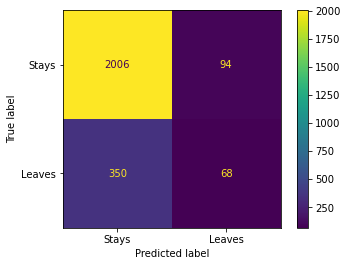

In [47]:
cm = confusion_matrix(y_val, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Stays', 'Leaves'])
disp.plot(values_format='d')

We want to compare models, so we'll build a comparison table that will be filled with the key metrics we are looking to.

In [48]:
# Create an empty DataFrame with the desired structure
metrics_df = pd.DataFrame(
    columns=['Logistic Regression', 'Random Forest'],
    index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
)

# --- Calculate Metrics ---
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# --- Store them in a list ---
log_reg_metrics = [accuracy, precision, recall, f1, roc_auc]

# Add the list of metrics to the 'Logistic Regression' column
metrics_df['Logistic Regression'] = log_reg_metrics

# Display the updated table
print(metrics_df)

           Logistic Regression Random Forest
Accuracy              0.823670           NaN
Precision             0.419753           NaN
Recall                0.162679           NaN
F1-Score              0.234483           NaN
ROC AUC               0.827487           NaN


### Tree-based Models

### Random Forest

Secondly, we'll try tree-based models, random forest, and XGBoost

In [49]:
### Modeling
# Define the y (target) variable
y = df1["left"]

# Define the X (predictor) variables
X = df1.drop("left", axis = 1)

# Split dataset into training and holdout datasets
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.3, random_state=42, stratify=y_tr)

In [50]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_random_cv = RandomizedSearchCV(rf,
                                  cv_params,
                                  scoring=scoring,
                                  cv=5,
                                  refit='f1',
                                  n_iter=50, # You control how many combinations to try
                                  random_state=42, # For reproducibility
                                  n_jobs=-1) # Use all available CPU cores to speed it up

# Start the clock and fit the model
start_time = time.time()
rf_random_cv.fit(X_train, y_train)
end_time = time.time()

print(f"Fitting completed in {end_time - start_time:.2f} seconds.")

Fitting completed in 36.68 seconds.


In [51]:
print("Best Parameters found:")
print(rf_random_cv.best_params_)

Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None}


In [52]:
# Predict on the validation set
y_pred_val = rf_random_cv.predict(X_val)
y_pred_proba_val = rf_random_cv.predict_proba(X_val)[:, 1]

In [53]:
# Calculate metrics for the Random Forest
rf_accuracy = accuracy_score(y_val, y_pred_val)
rf_precision = precision_score(y_val, y_pred_val)
rf_recall = recall_score(y_val, y_pred_val)
rf_f1 = f1_score(y_val, y_pred_val)
rf_roc_auc = roc_auc_score(y_val, y_pred_proba_val)

# Add the metrics to your comparison DataFrame
metrics_df['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]

print(metrics_df)

           Logistic Regression  Random Forest
Accuracy              0.823670       0.981732
Precision             0.419753       0.976923
Recall                0.162679       0.911483
F1-Score              0.234483       0.943069
ROC AUC               0.827487       0.982165


### XGBoost

In [54]:
# Calculate scale_pos_weight
# --- Step 1: Handle Class Imbalance (Do this once) ---
# Calculate the ratio for scale_pos_weight using your training data
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight: {ratio:.2f}")


# --- Step 2: Set up the Model and Randomized Search ---
# Initialize the model with the ratio
xgb = XGBClassifier(objective='binary:logistic', random_state=0, scale_pos_weight=ratio)

# Define the parameter grid (same as yours)
cv_params = {'max_depth': [7, 8],
             'min_child_weight': [1, 2,],
             'learning_rate': [0.1, 0.2],
             'n_estimators': [75, 100] # Added a few more options
            }

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Set up RandomizedSearchCV
xgb_cv_gs = GridSearchCV(xgb,
                            cv_params,
                            scoring=scoring,
                            cv=5,
                            refit='f1',
                            n_jobs=-1)      # Use all CPU cores


# --- Step 3: Fit the model ---
print("Starting XGBoost tuning...")
start_time = time.time()
xgb_cv_gs.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost tuning completed in {end_time - start_time:.2f} seconds.")


# --- Step 4: Check results and update your metrics table (Next Steps) ---
print("\nBest Parameters found:")
print(xgb_cv_gs.best_params_)

# Predict on the validation set
y_pred_val = xgb_cv_gs.predict(X_val)
y_pred_proba_val = xgb_cv_gs.predict_proba(X_val)[:, 1]

# Calculate and store metrics
metrics_df['XGBoost_GridSearch'] = [
    accuracy_score(y_val, y_pred_val),
    precision_score(y_val, y_pred_val),
    recall_score(y_val, y_pred_val),
    f1_score(y_val, y_pred_val),
    roc_auc_score(y_val, y_pred_proba_val)
]

print("\nUpdated Metrics Comparison Table:")
print(metrics_df.round(4))

Calculated scale_pos_weight: 5.02
Starting XGBoost tuning...
XGBoost tuning completed in 5.40 seconds.

Best Parameters found:
{'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}

Updated Metrics Comparison Table:
           Logistic Regression  Random Forest  XGBoost_GridSearch
Accuracy                0.8237         0.9817              0.9849
Precision               0.4198         0.9769              0.9798
Recall                  0.1627         0.9115              0.9282
F1-Score                0.2345         0.9431              0.9533
ROC AUC                 0.8275         0.9822              0.9842


In [55]:
# Define the parameter grid (same as yours)
cv_params = {'max_depth': [4, 5, 6, 7, 8],
             'min_child_weight': [1, 2, 3, 4, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125, 150, 200] # Added a few more options
            }

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Set up RandomizedSearchCV
xgb_cv = RandomizedSearchCV(xgb,
                            cv_params,
                            scoring=scoring,
                            cv=5,
                            refit='f1',
                            n_iter=50,      # Test 50 random combinations
                            random_state=42,
                            n_jobs=-1)      # Use all CPU cores


# --- Step 3: Fit the model ---
print("Starting XGBoost tuning...")
start_time = time.time()
xgb_cv.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost tuning completed in {end_time - start_time:.2f} seconds.")


# --- Step 4: Check results and update your metrics table (Next Steps) ---
print("\nBest Parameters found:")
print(xgb_cv.best_params_)

# Predict on the validation set
y_pred_val = xgb_cv.predict(X_val)
y_pred_proba_val = xgb_cv.predict_proba(X_val)[:, 1]

# Calculate and store metrics
metrics_df['XGBoost_Randomized CV'] = [
    accuracy_score(y_val, y_pred_val),
    precision_score(y_val, y_pred_val),
    recall_score(y_val, y_pred_val),
    f1_score(y_val, y_pred_val),
    roc_auc_score(y_val, y_pred_proba_val)
]

print("\nUpdated Metrics Comparison Table:")
print(metrics_df.round(4))

Starting XGBoost tuning...
XGBoost tuning completed in 18.49 seconds.

Best Parameters found:
{'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.1}

Updated Metrics Comparison Table:
           Logistic Regression  Random Forest  XGBoost_GridSearch  \
Accuracy                0.8237         0.9817              0.9849   
Precision               0.4198         0.9769              0.9798   
Recall                  0.1627         0.9115              0.9282   
F1-Score                0.2345         0.9431              0.9533   
ROC AUC                 0.8275         0.9822              0.9842   

           XGBoost_Randomized CV  
Accuracy                  0.9829  
Precision                 0.9676  
Recall                    0.9282  
F1-Score                  0.9475  
ROC AUC                   0.9834  


Our best model is the XGBoost model with the Grid Search parameters.

In [61]:
# Get the best parameters from your GridSearchCV
best_params = xgb_cv_gs.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}


## Model Evaluation

Once a champion is declared, we'll evaluate its prediction power.

In [62]:
# Initialize the final model with all the best settings
champion_model = XGBClassifier(objective='binary:logistic',
                               random_state=0,
                               scale_pos_weight=ratio, # The ratio we calculated before
                               **best_params) # Unpack the rest of the best params

# Re-train the model on the combined (train + validation) dataset
print("\nRe-training the champion model on all available data...")
champion_model.fit(X_tr, y_tr)
print("Re-training complete!")


Re-training the champion model on all available data...
Re-training complete!


--- Final Model Performance on Test Set ---
Accuracy: 0.9805
Precision: 0.9520
Recall: 0.9296
F1-Score: 0.9407
ROC AUC Score: 0.9838
-------------------------------------------

Classification Report:
              precision    recall  f1-score   support

       Stays       0.99      0.99      0.99      3001
      Leaves       0.95      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Confusion Matrix:


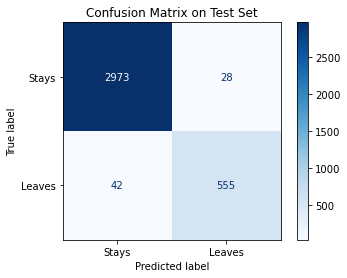

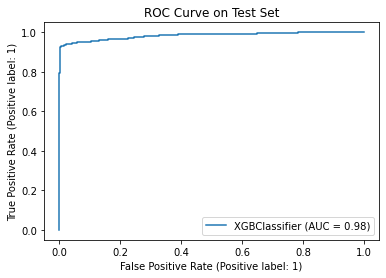

In [63]:
# --- Step 1: Make Predictions on the Test Set ---
# Get the hard predictions (0s and 1s)
y_pred_test = champion_model.predict(X_test)

# Get the probability predictions for the positive class (for ROC AUC)
y_pred_proba_test = champion_model.predict_proba(X_test)[:, 1]


# --- Step 2: Calculate and Print Final Metrics ---
print("--- Final Model Performance on Test Set ---")
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")
print("-------------------------------------------")


# --- Step 3: Visualize the Results ---

# 3a. Classification Report
# This provides a comprehensive breakdown of precision, recall, and f1-score
# for both classes ('Stays' and 'Leaves').
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Stays', 'Leaves']))


# 3b. Confusion Matrix
# This shows the raw numbers of correct and incorrect predictions.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test, labels=champion_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stays', 'Leaves'])

disp.plot(values_format='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.show()

# --- 3c. ROC Curve (using the modern 'from_estimator' method) ---
# This visualizes the model's ability to distinguish between classes.
RocCurveDisplay.from_estimator(champion_model, X_test, y_test)
plt.title("ROC Curve on Test Set")
plt.show()

Lastly, to get some insights we'll check the XGB feature importance method. This will indicate us which variables we need to pay more attention to.

--- Top 3 Most Important Features ---
           Feature  Importance
4           tenure    0.417670
0     satisfaction    0.181961
1  last_evaluation    0.058556
------------------------------------


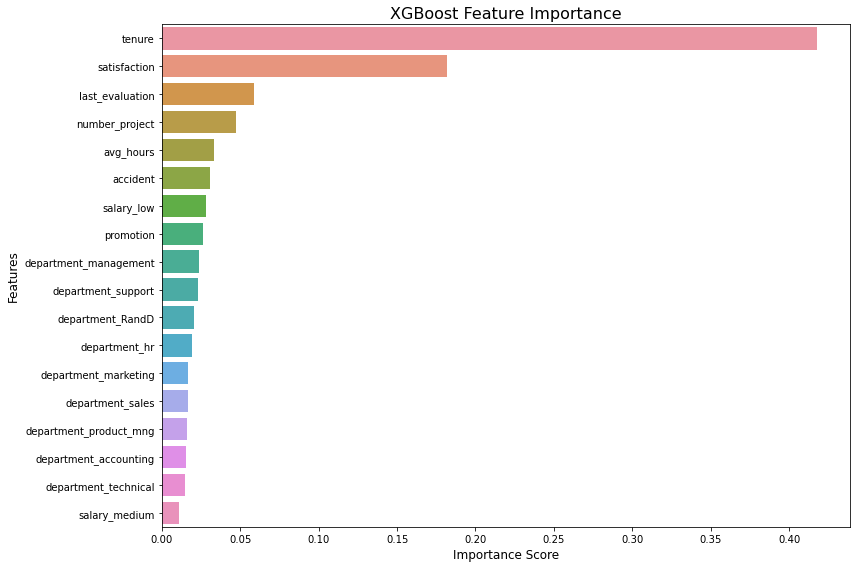

In [64]:
feature_importance_df = pd.DataFrame({
    'Feature': X_tr.columns,
    'Importance': champion_model.feature_importances_
}).sort_values(by='Importance', ascending=False) # Sort by importance


# --- Step 2: Print the Top 10 Most Important Features ---
print("--- Top 3 Most Important Features ---")
print(feature_importance_df.head(3))
print("------------------------------------")


# --- Step 3: Visualize the Feature Importances ---
# A horizontal bar chart is a great way to visualize this.
plt.figure(figsize=(12, 8)) # Set the figure size for better readability

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title('XGBoost Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout() # Adjust layout to make sure everything fits without overlapping
plt.show()

In [60]:
# --- Save the model to a file ---
filename = 'employee_resignation_model.pkl'
joblib.dump(champion_model, filename)

# --- You can now load it back anytime like this ---
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(some_new_data)

['employee_resignation_model.pkl']

## Conclusion and Next Steps
`Tenure` is the **Decisive Factor**: The single most dominant predictor of resignation is employee tenure, with an importance score of over 0.40. This strongly suggests that critical challenges and inflection points exist at specific stages of the employee lifecycle.
`Satisfaction` is a **Major Contributor**: After tenure, employee satisfaction level is the second most crucial factor (importance close to 0.20), confirming that daily job contentment remains a core pillar of employee retention.
`Workload` and `Performance Recognition` follow: Factors related to workload and career feedback, specifically number of projects and last performance evaluation, also play a significant role, though they are secondary to the primary drivers of tenure and satisfaction.